
# Fraud Detection



## 1. Loading Datasets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dermisfit/fraud-transactions-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fraud-transactions-dataset


In [1]:
import pandas as pd
import numpy as np

In [ ]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in directory:", file_list)

# Assuming the CSV file is named 'WA_Fn-UseC_-Telco-Customer-Churn.csv' based on common filenames for this dataset
csv_file_path = os.path.join(path, 'fraudTrain.csv')

# Check if the file exists before reading
if os.path.exists(csv_file_path):
    df_public = pd.read_csv(csv_file_path)
    print("Public dataset loaded successfully!")
    display(df_public.head())
else:
    print(f"Error: CSV file not found at {csv_file_path}")

Files in directory: ['fraudTest.csv', 'fraudTrain.csv']
Public dataset loaded successfully!


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0




> 加入區塊引述符號


## 2. Exploratory Data Analysis (EDA)


In [ ]:
df = df_public.copy()  # change to df_public if using public dataset
print(df.info())
print(df.describe())

# Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Generating Y-data Profiling
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="YData Profiling Report")
profile.to_file("fraudTrain_data_report.html")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ccd7fc7c4bb8aab66565c60fac31a5a73f82b855f5376a1d4769597ec1eec58f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [01:22<00:00,  3.57s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


## 3. Data Cleaning & Preparation


In [ ]:
# Handle missing values (if any)
df = df.fillna(0)

# Encode categorical variables (none in simulated, example for public dataset)
# df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_dataset.csv")

Cleaned dataset saved as cleaned_dataset.csv


Possible features we plan on adding:
- Transforming the data (2015-02-24 22:55:49 to day of the week and hour)
- calculating the average transaction amount for the last 7 days
- encoding browsers used for purchases

## 4. Feature Engineering

In [ ]:
# Just to find types of possible values in 'category'
poss_category = set(df['category'])
print(poss_category)

{'entertainment', 'misc_pos', 'grocery_pos', 'kids_pets', 'misc_net', 'shopping_net', 'personal_care', 'health_fitness', 'food_dining', 'travel', 'shopping_pos', 'grocery_net', 'gas_transport', 'home'}


In [ ]:
# Feature Engineering
df_fe = df_public.copy()

# 1. Separate different units of time
def month_segment(day: int) -> int:
  """ Categorize a day of the month into 'early'(0), 'mid'(1), or 'late'(2) and return it.
  """
  if day <= 10:
    return 0
  elif day <= 20:
    return 1
  else:
    return 2

df_fe['trans_date_trans_time'] = pd.to_datetime(df_fe['trans_date_trans_time'])
df_fe['minute'] = df_fe['trans_date_trans_time'].dt.minute
df_fe['hour'] = df_fe['trans_date_trans_time'].dt.hour
df_fe['day_of_week'] = df_fe['trans_date_trans_time'].dt.dayofweek # 0 = Monday, 6 = Sunday
df_fe['day_of_month'] = df_fe['trans_date_trans_time'].dt.day
df_fe['month'] = df_fe['trans_date_trans_time'].dt.month
df_fe['month_segment'] = df_fe['day_of_month'].apply(month_segment)
display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,minute,hour,day_of_week,day_of_month,month,month_segment
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1325376018,36.011293,-82.048315,0,0,0,1,1,1,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1325376044,49.159047,-118.186462,0,0,0,1,1,1,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1325376051,43.150704,-112.154481,0,0,0,1,1,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1325376076,47.034331,-112.561071,0,1,0,1,1,1,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1325376186,38.674999,-78.632459,0,3,0,1,1,1,0


In [ ]:
# 2. Reduce Skewness
df_fe['amt_log'] = np.log1p(df_fe['amt'])
df_fe['city_pop_log'] = np.log1p(df_fe['city_pop'])
display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,minute,hour,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-82.048315,0,0,0,1,1,1,0,1.786747,8.159375
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.186462,0,0,0,1,1,1,0,4.684259,5.010635
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.154481,0,0,0,1,1,1,0,5.398660,8.332068
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.561071,0,1,0,1,1,1,0,3.828641,7.570443
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-78.632459,0,3,0,1,1,1,0,3.760269,4.605170


In [ ]:
# 3. Location Based Categorization & Calculation
def city_size(city_pop: int) -> int:
  """ Categorize a city's population into 'extra small'(0), 'small'(1), medium'(2), 'large'(3), or 'extra large'(4) and return it.
  """
  if city_pop < 50000:
    return 0
  elif city_pop < 200000:
    return 1
  elif city_pop < 500000:
    return 2
  elif city_pop < 1500000:
    return 3
  else:
    return 4

df_fe['city_size'] = df_fe['city_pop'].apply(city_size)


def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    """ Calculate the Haversine distance between two lat/long points, and return the distance in kilometers.
    """
    R = 6371  # Earth radius in km

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df_fe['trans_dis'] = df_fe.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,minute,hour,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log,city_size,trans_dis
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,1,1,1,0,1.786747,8.159375,0,78.597568
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,0,1,1,1,0,4.684259,5.010635,0,30.212176
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,1,1,1,0,5.398660,8.332068,0,108.206083
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,0,1,1,1,0,3.828641,7.570443,0,95.673231
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,3,0,1,1,1,0,3.760269,4.605170,0,77.556744


In [ ]:
# 4. Cardholder Information
def gender_cate(gender: str) -> int:
  """ Categorize a gender into 'male'(0) or 'female'(1) and return it.
  """
  if gender == 'M':
    return 0
  elif gender == 'F':
    return 1

df_fe['gender_cate'] = df_fe['gender'].apply(gender_cate)

def get_age(dob, trans_date) -> int:
  """ Calculate the age of the cardholder at the time of the transaction and return it.
  """
  dob = pd.to_datetime(dob)
  trans_date = pd.to_datetime(trans_date)
  return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))

df_fe['dob'] = pd.to_datetime(df_fe['dob'])
df_fe['age'] = df_fe.apply(lambda row: get_age(row['dob'], row['trans_date_trans_time']), axis=1)

display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log,city_size,trans_dis,gender_cate,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,1,1,0,1.786747,8.159375,0,78.597568,1,30
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,1,1,0,4.684259,5.010635,0,30.212176,1,40
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1,1,1,0,5.398660,8.332068,0,108.206083,0,56
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1,1,1,0,3.828641,7.570443,0,95.673231,0,51
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1,1,1,0,3.760269,4.605170,0,77.556744,0,32


In [ ]:
# 5. Target Encoding

# Calculate fraud rate per job
fraud_rate_per_job = df_fe.groupby('job')['is_fraud'].mean()
df_fe['job_fraud_r'] = df_fe['job'].map(fraud_rate_per_job)

# Calculate fraud rate per merchant
fraud_rate_per_merchant = df_fe.groupby('merchant')['is_fraud'].mean()
df_fe['merchant_fraud_r'] = df_fe['merchant'].map(fraud_rate_per_merchant)

# Calculate fraud rate per category
fraud_rate_per_category = df_fe.groupby('category')['is_fraud'].mean()
df_fe['category_fraud_r'] = df_fe['category'].map(fraud_rate_per_category)

# Calculate fraud rate per city
fraud_rate_per_city = df_fe.groupby('city')['is_fraud'].mean()
df_fe['city_fraud_r'] = df_fe['city'].map(fraud_rate_per_city)

# Calculate fraud rate per state
fraud_rate_per_state = df_fe.groupby('state')['is_fraud'].mean()
df_fe['state_fraud_r'] = df_fe['state'].map(fraud_rate_per_state)

display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop_log,city_size,trans_dis,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,8.159375,0,78.597568,1,30,0.001693,0.014207,0.014458,0.000000,0.004923
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,5.010635,0,30.212176,1,40,0.002157,0.010787,0.014098,0.000000,0.005073
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,8.332068,0,108.206083,0,56,0.015656,0.002111,0.002478,0.000000,0.001984
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,7.570443,0,95.673231,0,51,0.007905,0.003444,0.004694,0.030426,0.002722
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,4.605170,0,77.556744,0,32,0.000000,0.003769,0.003139,0.000000,0.006769


In [ ]:
# 6. Interactions & Combine Features
# Big amt in small city could be suspicious
df_fe['amt_citypop_ratio'] = df_fe['amt'] / (df_fe['city_pop'] + 1e-5) # 1e-5 prevents division by 0
# Big amt with big distance could be suspicious
df_fe['dis_amt_prod'] = df_fe['trans_dis'] * df_fe['amt']

# Big amt late at night could be suspicious
def hour_risk(hour: int, minute: int) -> int:
  """Calculate the night-risk score for a given hour and minute of the day using Normal Distribution Formula and return it
    Late-night hours (e.g. 12 AM – 4 AM) are considered higher risk.
    Risk ranges from 0 to 1.
  """
  peak_hour = 2
  sigma = 2
  hour_decimal = hour + minute / 60
  risk = np.exp(-0.5 * ((hour_decimal - peak_hour) / sigma) ** 2)
  return risk

df_fe['amt_hour_risk_prod'] = df_fe.apply(lambda row: row['amt'] * hour_risk(row['hour'], row['minute']), axis=1)
display(df_fe.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1,30,0.001693,0.014207,0.014458,0.000000,0.004923,0.001422,390.629915,3.014457
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,40,0.002157,0.010787,0.014098,0.000000,0.005073,0.719664,3239.651602,65.038283
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,56,0.015656,0.002111,0.002478,0.000000,0.001984,0.052987,23817.240838,133.503464
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,51,0.007905,0.003444,0.004694,0.030426,0.002722,0.023208,4305.295401,27.521323
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,32,0.000000,0.003769,0.003139,0.000000,0.006769,0.423838,3254.280963,26.086144


In [ ]:
# Save FE dataset
df_fe.to_csv("fraudTrain_FE.csv", index=False)
print("FE dataset saved as fraudTrain_FE.csv")

FE dataset saved as fraudTrain_FE.csv


## 5. Prepare Testing Dataset


In [ ]:
# Prepare Testing Dataset
df_test = pd.read_csv("fraudTest.csv")

In [ ]:
# 1. Separate different units of time
def month_segment(day: int) -> int:
  """ Categorize a day of the month into 'early'(0), 'mid'(1), or 'late'(2) and return it.
  """
  if day <= 10:
    return 0
  elif day <= 20:
    return 1
  else:
    return 2

df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_test['minute'] = df_test['trans_date_trans_time'].dt.minute
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek # 0 = Monday, 6 = Sunday
df_test['day_of_month'] = df_test['trans_date_trans_time'].dt.day
df_test['month'] = df_test['trans_date_trans_time'].dt.month
df_test['month_segment'] = df_test['day_of_month'].apply(month_segment)
display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,unix_time,merch_lat,merch_long,is_fraud,minute,hour,day_of_week,day_of_month,month,month_segment
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,1371816865,33.986391,-81.200714,0,14,12,6,21,6,2
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1371816873,39.450498,-109.960431,0,14,12,6,21,6,2
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1371816893,40.495810,-74.196111,0,14,12,6,21,6,2
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,1371816915,28.812398,-80.883061,0,15,12,6,21,6,2
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1371816917,44.959148,-85.884734,0,15,12,6,21,6,2


In [ ]:
# 2. Reduce Skewness
df_test['amt_log'] = np.log1p(df_test['amt'])
df_test['city_pop_log'] = np.log1p(df_test['city_pop'])
display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,minute,hour,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-81.200714,0,14,12,6,21,6,2,1.350667,12.717392
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-109.960431,0,14,12,6,21,6,2,3.428813,5.713733
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-74.196111,0,14,12,6,21,6,2,3.744314,10.448628
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.883061,0,15,12,6,21,6,2,4.111693,10.910861
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.884734,0,15,12,6,21,6,2,1.432701,7.027315


In [ ]:
# 3. Location Based Categorization & Calculation

def city_size(city_pop: int) -> int:
  """ Categorize a city's population into 'extra small'(0), 'small'(1), medium'(2), 'large'(3), or 'extra large'(4) and return it.
  """
  if city_pop < 50000:
    return 0
  elif city_pop < 200000:
    return 1
  elif city_pop < 500000:
    return 2
  elif city_pop < 1500000:
    return 3
  else:
    return 4

df_test['city_size'] = df_test['city_pop'].apply(city_size)

def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    """ Calculate the Haversine distance between two lat/long points, and return the distance in kilometers.
    """
    R = 6371  # Earth radius in km

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df_test['trans_dis'] = df_test.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,minute,hour,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log,city_size,trans_dis
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,14,12,6,21,6,2,1.350667,12.717392,2,24.561462
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,14,12,6,21,6,2,3.428813,5.713733,0,104.925092
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,14,12,6,21,6,2,3.744314,10.448628,0,59.080078
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,15,12,6,21,6,2,4.111693,10.910861,1,27.698567
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,15,12,6,21,6,2,1.432701,7.027315,0,104.335106


In [ ]:
# 4. Cardholder Information
def gender_cate(gender: str) -> int:
  """ Categorize a gender into 'male'(0) or 'female'(1) and return it.
  """
  if gender == 'M':
    return 0
  elif gender == 'F':
    return 1

df_test['gender_cate'] = df_test['gender'].apply(gender_cate)

def get_age(dob, trans_date) -> int:
  """ Calculate the age of the cardholder at the time of the transaction and return it.
  """
  dob = pd.to_datetime(dob)
  trans_date = pd.to_datetime(trans_date)
  return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))

df_test['dob'] = pd.to_datetime(df_test['dob'])
df_test['age'] = df_test.apply(lambda row: get_age(row['dob'], row['trans_date_trans_time']), axis=1)

display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log,city_size,trans_dis,gender_cate,age
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,6,21,6,2,1.350667,12.717392,2,24.561462,0,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,6,21,6,2,3.428813,5.713733,0,104.925092,1,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,6,21,6,2,3.744314,10.448628,0,59.080078,1,49
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,6,21,6,2,4.111693,10.910861,1,27.698567,0,32
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,6,21,6,2,1.432701,7.027315,0,104.335106,0,64


In [ ]:
# Check the mean for different fraud rates
df_fe = pd.read_csv("fraudTrain_FE.csv")
fraud_rate_mean = df_fe['is_fraud'].mean()
print(fraud_rate_mean)

0.005788651743883394


In [ ]:
# 5. Target Encoding

# Calculate fraud rate per job
fraud_rate_per_job = df_fe.groupby('job')['is_fraud'].mean()
df_test['job_fraud_r'] = df_test['job'].map(fraud_rate_per_job).fillna(fraud_rate_mean)

# Calculate fraud rate per merchant
fraud_rate_per_merchant = df_fe.groupby('merchant')['is_fraud'].mean()
df_test['merchant_fraud_r'] = df_test['merchant'].map(fraud_rate_per_merchant).fillna(fraud_rate_mean)

# Calculate fraud rate per category
fraud_rate_per_category = df_fe.groupby('category')['is_fraud'].mean()
df_test['category_fraud_r'] = df_test['category'].map(fraud_rate_per_category).fillna(fraud_rate_mean)

# Calculate fraud rate per city
fraud_rate_per_city = df_fe.groupby('city')['is_fraud'].mean()
df_test['city_fraud_r'] = df_test['city'].map(fraud_rate_per_city).fillna(fraud_rate_mean)

# Calculate fraud rate per state
fraud_rate_per_state = df_fe.groupby('state')['is_fraud'].mean()
df_test['state_fraud_r'] = df_test['state'].map(fraud_rate_per_state).fillna(fraud_rate_mean)

display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,52,0.008700,0.001101,0.002424,0.007687,0.006612,0.000009,70.245781,0.000006
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1,30,0.006888,0.002740,0.002424,0.006702,0.005701,0.098808,3130.964753,0.000062
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1,49,0.002910,0.001166,0.001549,0.002716,0.006647,0.001197,2438.825609,0.000085
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,32,0.012298,0.004297,0.003139,0.000000,0.006585,0.001096,1663.298966,0.000119
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,64,0.009790,0.001203,0.002864,0.005408,0.005157,0.002833,332.828989,0.000006


In [ ]:
# 6. Interactions & Combine Features
# Big amt in small city could be suspicious
df_test['amt_citypop_ratio'] = df_test['amt'] / (df_test['city_pop'] + 1e-5) # 1e-5 prevents division by 0
# Big amt with big distance could be suspicious
df_test['dis_amt_prod'] = df_test['trans_dis'] * df_test['amt']

# Big amt late at night could be suspicious
def hour_risk(hour: int, minute: int) -> int:
  """Calculate the night-risk score for a given hour and minute of the day using Normal Distribution Formula and return it
    Late-night hours (e.g. 12 AM – 4 AM) are considered higher risk.
    Risk ranges from 0 to 1.
  """
  peak_hour = 2
  sigma = 2
  hour_decimal = hour + minute / 60
  risk = np.exp(-0.5 * ((hour_decimal - peak_hour) / sigma) ** 2)
  return risk

df_test['amt_hour_risk_prod'] = df_test.apply(lambda row: row['amt'] * hour_risk(row['hour'], row['minute']), axis=1)
display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,0,52,0.008700,0.001101,0.002424,0.007687,0.006612,0.000009,70.245781,0.000006
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,1,30,0.006888,0.002740,0.002424,0.006702,0.005701,0.098808,3130.964753,0.000062
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,1,49,0.002910,0.001166,0.001549,0.002716,0.006647,0.001197,2438.825609,0.000085
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,0,32,0.012298,0.004297,0.003139,0.000000,0.006585,0.001096,1663.298966,0.000119
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,0,64,0.009790,0.001203,0.002864,0.005408,0.005157,0.002833,332.828989,0.000006


In [ ]:
print(df_test.info())
print(df_test.describe())

# Missing values check
print("\nMissing values per column:")
print(df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [ ]:
# Save FE Test dataset
df_test.to_csv("fraudTest_FE.csv", index=False)
print("scaled dataset saved as fraudTest_FE.csv")

scaled dataset saved as fraudTest_FE.csv


In [5]:
# Scaling All Numerical Variables
from sklearn.preprocessing import StandardScaler

# Assume df is your dataframe
scaler = StandardScaler()

# Select numeric columns
df_scaled = pd.read_csv("fraudTrain_FE.csv")
num_cols = df_scaled.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop("is_fraud")
print(num_cols)

# Fit and transform
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
display(df_scaled.head())

# Select numeric columns
df_test_scaled = pd.read_csv("fraudTest_FE.csv")
num_cols = df_test_scaled.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop("is_fraud")
print(num_cols)

# Fit and transform
df_test_scaled[num_cols] = scaler.transform(df_test_scaled[num_cols])
display(df_test_scaled.head())

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'minute', 'hour', 'day_of_week',
       'day_of_month', 'month', 'month_segment', 'amt_log', 'city_pop_log',
       'city_size', 'trans_dis', 'gender_cate', 'age', 'job_fraud_r',
       'merchant_fraud_r', 'category_fraud_r', 'city_fraud_r', 'state_fraud_r',
       'amt_citypop_ratio', 'dis_amt_prod', 'amt_hour_risk_prod'],
      dtype='object')


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,-1.732049,2019-01-01 00:00:18,-0.316692,"fraud_Rippin, Kub and Mann",misc_net,-0.407826,Jennifer,Banks,F,561 Perry Cove,...,0.909206,-0.890778,-0.310677,1.517923,1.615782,-0.268432,-0.300524,-0.141311,-0.376266,-0.188279
1,-1.732047,2019-01-01 00:00:44,-0.318757,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.230039,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0.909206,-0.315967,-0.275426,0.901291,1.548622,-0.268432,-0.248480,0.837874,-0.160098,1.284847
2,-1.732044,2019-01-01 00:00:51,-0.318728,fraud_Lind-Buckridge,entertainment,0.934149,Edward,Sanchez,M,594 White Dale Suite 530,...,-1.099861,0.603731,0.748371,-0.663172,-0.616973,-0.268432,-1.320944,-0.071012,1.401218,2.910962
3,-1.732041,2019-01-01 00:01:16,-0.316058,"fraud_Kutch, Hermiston and Farrell",gas_transport,-0.158132,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-1.099861,0.316326,0.160528,-0.422721,-0.204031,1.142483,-1.064486,-0.111611,-0.079242,0.393783
4,-1.732039,2019-01-01 00:03:06,-0.318471,fraud_Keeling-Crist,misc_pos,-0.177094,Tyler,Garcia,M,408 Bradley Rest,...,-1.099861,-0.775816,-0.439048,-0.364203,-0.493928,-0.268432,0.340428,0.434572,-0.158988,0.359696


Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'minute', 'hour', 'day_of_week',
       'day_of_month', 'month', 'month_segment', 'amt_log', 'city_pop_log',
       'city_size', 'trans_dis', 'gender_cate', 'age', 'job_fraud_r',
       'merchant_fraud_r', 'category_fraud_r', 'city_fraud_r', 'state_fraud_r',
       'amt_citypop_ratio', 'dis_amt_prod', 'amt_hour_risk_prod'],
      dtype='object')


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,-1.732049,2020-06-21 12:14:25,-0.317007,fraud_Kirlin and Sons,personal_care,-0.420988,Jeff,Elliott,M,351 Darlene Green,...,-1.099861,0.373807,0.220837,-0.845200,-0.627098,0.088048,0.285792,-0.143238,-0.400575,-0.259875
1,-1.732047,2020-06-21 12:14:33,-0.316028,fraud_Sporer-Keebler,personal_care,-0.252695,Joanne,Williams,F,3638 Marsh Union,...,0.909206,-0.890778,0.083367,-0.549770,-0.627098,0.042343,-0.030268,-0.008544,-0.168344,-0.259874
2,-1.732044,2020-06-21 12:14:53,-0.316009,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,-0.181336,Ashley,Lopez,F,9333 Valentine Point,...,0.909206,0.201363,-0.218351,-0.833627,-0.790243,-0.142470,0.297864,-0.141619,-0.220860,-0.259874
3,-1.732041,2020-06-21 12:15:15,-0.316013,fraud_Haley Group,misc_pos,-0.064255,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-1.099861,-0.775816,0.493691,-0.268948,-0.493928,-0.268432,0.276562,-0.141755,-0.279703,-0.259873
4,-1.732039,2020-06-21 12:15:17,-0.316063,fraud_Johnston-Casper,travel,-0.418929,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-1.099861,1.063580,0.303452,-0.826799,-0.545152,-0.017649,-0.219413,-0.139388,-0.380652,-0.259875


In [6]:
# Save scaled dataset
df_scaled.to_csv("fraudTrain_scaled.csv", index=False)
print("scaled dataset saved as fraudTrain_scaled.csv")

df_test_scaled.to_csv("fraudTest_scaled.csv", index=False)
print("scaled dataset saved as fraudTest_scaled.csv")

scaled dataset saved as fraudTrain_scaled.csv
scaled dataset saved as fraudTest_scaled.csv


## 6. Feature Selection


In [1]:
# Get All Column Titles
import pandas as pd
df_fs = pd.read_csv("fraudTrain_scaled.csv")
print(df_fs.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'minute', 'hour', 'day_of_week',
       'day_of_month', 'month', 'month_segment', 'amt_log', 'city_pop_log',
       'city_size', 'trans_dis', 'gender_cate', 'age', 'job_fraud_r',
       'merchant_fraud_r', 'category_fraud_r', 'city_fraud_r', 'state_fraud_r',
       'amt_citypop_ratio', 'dis_amt_prod', 'amt_hour_risk_prod'],
      dtype='object')


In [2]:
# 1. Dropping Irrelevant Columns
cols_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
    'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'amt'
]

df_fs = df_fs.drop(columns=cols_to_drop, inplace=False)
display(df_fs.head())

,is_fraud,minute,hour,day_of_week,day_of_month,month,month_segment,amt_log,city_pop_log,city_size,...,gender_cate,age,job_fraud_r,merchant_fraud_r,category_fraud_r,city_fraud_r,state_fraud_r,amt_citypop_ratio,dis_amt_prod,amt_hour_risk_prod
0,0,-1.702944,-1.878145,-0.941975,-1.652258,-1.504564,-1.220147,-1.354630,-0.082541,-0.412694,...,0.909206,-0.890778,-0.310677,1.517923,1.615782,-0.268432,-0.300524,-0.141311,-0.376266,-0.188279
1,0,-1.702944,-1.878145,-0.941975,-1.652258,-1.504564,-1.220147,0.892466,-1.366895,-0.412694,...,0.909206,-0.315967,-0.275426,0.901291,1.548622,-0.268432,-0.248480,0.837874,-0.160098,1.284847
2,0,-1.702944,-1.878145,-0.941975,-1.652258,-1.504564,-1.220147,1.446503,-0.012101,-0.412694,...,-1.099861,0.603731,0.748371,-0.663172,-0.616973,-0.268432,-1.320944,-0.071012,1.401218,2.910962
3,0,-1.645208,-1.878145,-0.941975,-1.652258,-1.504564,-1.220147,0.228913,-0.322763,-0.412694,...,-1.099861,0.316326,0.160528,-0.422721,-0.204031,1.142483,-1.064486,-0.111611,-0.079242,0.393783
4,0,-1.529736,-1.878145,-0.941975,-1.652258,-1.504564,-1.220147,0.175889,-1.532282,-0.412694,...,-1.099861,-0.775816,-0.439048,-0.364203,-0.493928,-0.268432,0.340428,0.434572,-0.158988,0.359696


In [4]:
len(df_fs)

1296675

In [6]:
# 2. VIF Checking
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop target column
X = df_fs.drop(columns=["is_fraud"])

# VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Rank VIF results in ascending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=True).reset_index(drop=True)
print(vif_data_sorted)

               feature       VIF
0               minute  1.000140
1        state_fraud_r  1.001501
2                month  1.001933
3          day_of_week  1.002136
4          gender_cate  1.008509
5            trans_dis  1.039380
6                  age  1.068136
7    amt_citypop_ratio  1.287654
8   amt_hour_risk_prod  1.305304
9          job_fraud_r  1.309719
10        city_fraud_r  1.314711
11             amt_log  1.360335
12                hour  1.438578
13        dis_amt_prod  1.624498
14           city_size  2.541177
15        city_pop_log  2.676752
16        day_of_month  9.015310
17       month_segment  9.015483
18    merchant_fraud_r  9.043678
19    category_fraud_r  9.222384


Highly correlated features (>0.9): [('day_of_month', 'month_segment'), ('month_segment', 'day_of_month'), ('merchant_fraud_r', 'category_fraud_r'), ('category_fraud_r', 'merchant_fraud_r')]


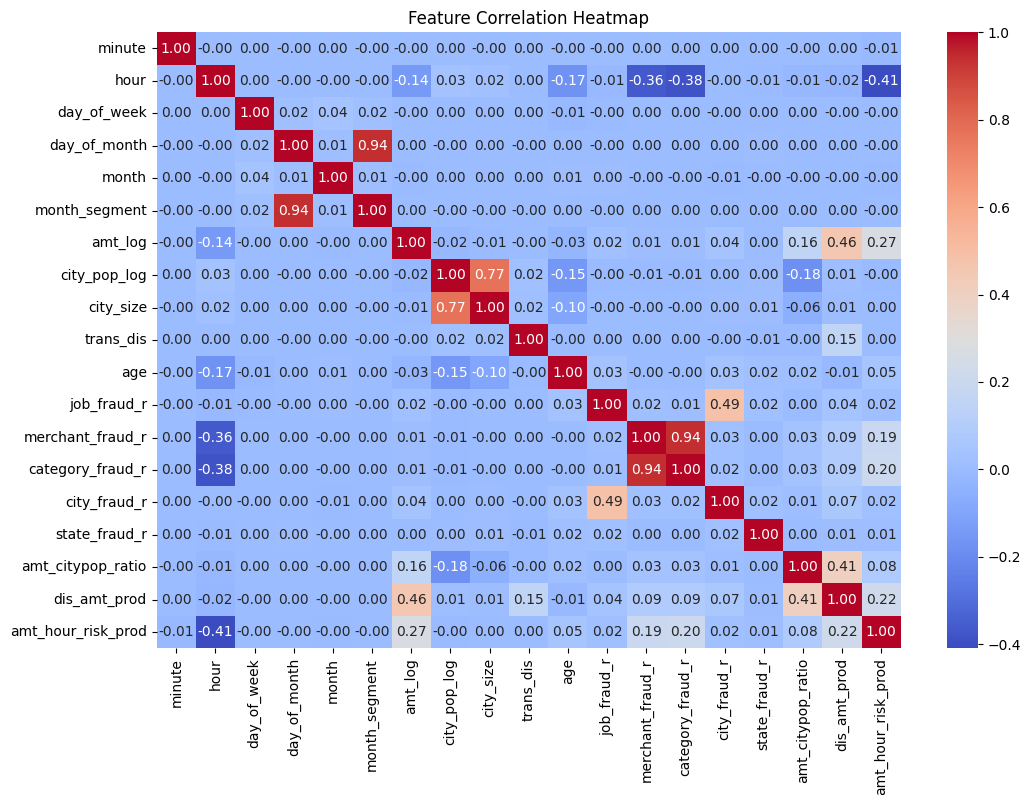

In [5]:
# 3. Filter Methods (Correlation / Mutual Information)
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

# Drop target before checking correlation
X = df_fs.drop(columns=["is_fraud"])
y = df_fs["is_fraud"]

# Correlation Matrix
corr_matrix = X.corr()
high_corr = [(c1, c2) for c1 in corr_matrix.columns for c2 in corr_matrix.columns
             if c1 != c2 and abs(corr_matrix.loc[c1, c2]) > 0.9]
print("Highly correlated features (>0.9):", high_corr)
# Plot heatmap
numeric_X = df_fs.drop(columns=["is_fraud", "gender_cate"])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
# Mutual Information
mi = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Top features by mutual info:\n", mi_scores.head(10))

Top features by mutual info:
 gender_cate           0.147311
month_segment         0.094726
city_size             0.074126
day_of_week           0.043177
amt_hour_risk_prod    0.026455
category_fraud_r      0.021317
month                 0.020987
amt_log               0.017406
hour                  0.015347
dis_amt_prod          0.011729
dtype: float64


In [4]:
# 4. Wrapper Methods (Recursive Feature Elimination - RFE)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000, solver="liblinear")
rfe = RFE(model, n_features_to_select=10)  # keep top 10 features
fit = rfe.fit(X, y)

rfe_results = pd.DataFrame({
    "feature": X.columns,
    "selected": fit.support_,
    "ranking": fit.ranking_
}).sort_values("ranking")

print(rfe_results)

               feature  selected  ranking
1                 hour      True        1
4                month      True        1
6              amt_log      True        1
14    category_fraud_r      True        1
12         job_fraud_r      True        1
13    merchant_fraud_r      True        1
10         gender_cate      True        1
11                 age      True        1
15        city_fraud_r      True        1
19  amt_hour_risk_prod      True        1
16       state_fraud_r     False        2
7         city_pop_log     False        3
8            city_size     False        4
3         day_of_month     False        5
5        month_segment     False        6
2          day_of_week     False        7
0               minute     False        8
9            trans_dis     False        9
18        dis_amt_prod     False       10
17   amt_citypop_ratio     False       11


In [9]:
# 5. Embedded Methods (Lasso + Tree Importance)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

# Lasso (L1 regularization)
lasso = LogisticRegressionCV(Cs=10, penalty="l1", solver="liblinear", cv=5, max_iter=1000)
lasso.fit(X, y)
lasso_importance = pd.Series(np.abs(lasso.coef_[0]), index=X.columns).sort_values(ascending=False)
print("Top features from Lasso:\n", lasso_importance.head(10))

# Random Forest Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top features from Random Forest:\n", rf_importance.head(10))

Top features from Lasso:
 city_fraud_r          1.919610
amt_log               1.436896
hour                  0.793673
merchant_fraud_r      0.439633
job_fraud_r           0.377782
category_fraud_r      0.244661
amt_hour_risk_prod    0.183513
age                   0.183346
month                 0.173529
gender_cate           0.110020
dtype: float64
Top features from Random Forest:
 amt_log               0.208383
category_fraud_r      0.129071
city_fraud_r          0.092476
hour                  0.086281
amt_hour_risk_prod    0.077851
dis_amt_prod          0.077555
age                   0.064931
merchant_fraud_r      0.054968
job_fraud_r           0.035319
amt_citypop_ratio     0.032125
dtype: float64


## 7. Model

In [2]:
# 1. Prepare training and test data
df_fs = pd.read_csv("fraudTrain_scaled.csv")
df_test = pd.read_csv("fraudTest_scaled.csv")

cols_to_drop = [
    'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
    'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'amt'
]

df_fs = df_fs.drop(columns=cols_to_drop, inplace=False)
df_test = df_test.drop(columns=cols_to_drop, inplace=False)

# FS using VIF
cols_to_retain = [
    "minute", "state_fraud_r", "month", "day_of_week", "gender_cate", "trans_dis",
    "age", "amt_citypop_ratio", "amt_hour_risk_prod", "job_fraud_r", "city_fraud_r",
    "amt_log", "hour", "dis_amt_prod", "city_size", "city_pop_log"
]
df_fs_vif = df_fs[cols_to_retain + ["is_fraud"]]
print("-- VIF --")
display(df_fs_vif.head())

# FS using Filter Methods
cols_to_retain = [
    "gender_cate", "month_segment", "city_size", "day_of_week", "amt_hour_risk_prod", 
    "category_fraud_r", "month", "amt_log", "hour", "dis_amt_prod"
]
df_fs_mi = df_fs[cols_to_retain + ['is_fraud']]
print("-- Mutual Information --")
display(df_fs_mi.head())

# FS using RFE & Lasso (They have the same set)
cols_to_retain = [
    "hour", "month", "amt_log", "category_fraud_r", "job_fraud_r", "merchant_fraud_r",
    "gender_cate", "age", "city_fraud_r", "amt_hour_risk_prod"
]
df_fs_lasso = df_fs[cols_to_retain + ['is_fraud']]
print("-- Lasso --")
display(df_fs_lasso.head())

# FS using Random Forest
cols_to_retain = [
    "amt_log", "category_fraud_r", "city_fraud_r", "hour", "amt_hour_risk_prod",
    "dis_amt_prod", "age", "merchant_fraud_r", "job_fraud_r", "amt_citypop_ratio"
]
df_fs_rf = df_fs[cols_to_retain + ['is_fraud']]
print("-- Random Forest --")
display(df_fs_rf.head())

-- VIF --


,minute,state_fraud_r,month,day_of_week,gender_cate,trans_dis,age,amt_citypop_ratio,amt_hour_risk_prod,job_fraud_r,city_fraud_r,amt_log,hour,dis_amt_prod,city_size,city_pop_log,is_fraud
0,-1.702944,-0.300524,-1.504564,-0.941975,0.909206,0.085274,-0.890778,-0.141311,-0.188279,-0.310677,-0.268432,-1.354630,-1.878145,-0.376266,-0.412694,-0.082541,0
1,-1.702944,-0.248480,-1.504564,-0.941975,0.909206,-1.576488,-0.315967,0.837874,1.284847,-0.275426,-0.268432,0.892466,-1.878145,-0.160098,-0.412694,-1.366895,0
2,-1.702944,-1.320944,-1.504564,-0.941975,-1.099861,1.102157,0.603731,-0.071012,2.910962,0.748371,-0.268432,1.446503,-1.878145,1.401218,-0.412694,-0.012101,0
3,-1.645208,-1.064486,-1.504564,-0.941975,-1.099861,0.671726,0.316326,-0.111611,0.393783,0.160528,1.142483,0.228913,-1.878145,-0.079242,-0.412694,-0.322763,0
4,-1.529736,0.340428,-1.504564,-0.941975,-1.099861,0.049528,-0.775816,0.434572,0.359696,-0.439048,-0.268432,0.175889,-1.878145,-0.158988,-0.412694,-1.532282,0


-- Mutual Information --


,gender_cate,month_segment,city_size,day_of_week,amt_hour_risk_prod,category_fraud_r,month,amt_log,hour,dis_amt_prod,is_fraud
0,0.909206,-1.220147,-0.412694,-0.941975,-0.188279,1.615782,-1.504564,-1.354630,-1.878145,-0.376266,0
1,0.909206,-1.220147,-0.412694,-0.941975,1.284847,1.548622,-1.504564,0.892466,-1.878145,-0.160098,0
2,-1.099861,-1.220147,-0.412694,-0.941975,2.910962,-0.616973,-1.504564,1.446503,-1.878145,1.401218,0
3,-1.099861,-1.220147,-0.412694,-0.941975,0.393783,-0.204031,-1.504564,0.228913,-1.878145,-0.079242,0
4,-1.099861,-1.220147,-0.412694,-0.941975,0.359696,-0.493928,-1.504564,0.175889,-1.878145,-0.158988,0


-- Lasso --


,hour,month,amt_log,category_fraud_r,job_fraud_r,merchant_fraud_r,gender_cate,age,city_fraud_r,amt_hour_risk_prod,is_fraud
0,-1.878145,-1.504564,-1.354630,1.615782,-0.310677,1.517923,0.909206,-0.890778,-0.268432,-0.188279,0
1,-1.878145,-1.504564,0.892466,1.548622,-0.275426,0.901291,0.909206,-0.315967,-0.268432,1.284847,0
2,-1.878145,-1.504564,1.446503,-0.616973,0.748371,-0.663172,-1.099861,0.603731,-0.268432,2.910962,0
3,-1.878145,-1.504564,0.228913,-0.204031,0.160528,-0.422721,-1.099861,0.316326,1.142483,0.393783,0
4,-1.878145,-1.504564,0.175889,-0.493928,-0.439048,-0.364203,-1.099861,-0.775816,-0.268432,0.359696,0


-- Random Forest --


,amt_log,category_fraud_r,city_fraud_r,hour,amt_hour_risk_prod,dis_amt_prod,age,merchant_fraud_r,job_fraud_r,amt_citypop_ratio,is_fraud
0,-1.354630,1.615782,-0.268432,-1.878145,-0.188279,-0.376266,-0.890778,1.517923,-0.310677,-0.141311,0
1,0.892466,1.548622,-0.268432,-1.878145,1.284847,-0.160098,-0.315967,0.901291,-0.275426,0.837874,0
2,1.446503,-0.616973,-0.268432,-1.878145,2.910962,1.401218,0.603731,-0.663172,0.748371,-0.071012,0
3,0.228913,-0.204031,1.142483,-1.878145,0.393783,-0.079242,0.316326,-0.422721,0.160528,-0.111611,0
4,0.175889,-0.493928,-0.268432,-1.878145,0.359696,-0.158988,-0.775816,-0.364203,-0.439048,0.434572,0


In [3]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
import xgboost as xgb
import lightgbm as lgb

# Datasets from FS
datasets = {
    "VIF": df_fs_vif,
    "Mutual Information": df_fs_mi,
    "Lasso": df_fs_lasso,
    "Random Forest": df_fs_rf
}

In [9]:
# 2. Logistic Regression
for fs, df in datasets.items():
    print(f"\n=== Feature Selection: {fs} ===")

    # Split features and target
    X_train = df.drop(columns=["is_fraud"])
    y_train = df["is_fraud"]

    X_test = df_test[X_train.columns]
    y_test = df_test["is_fraud"]

    print("\n-- Logistic Regression --")
    lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    y_proba_lr = lr.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred_lr))

    print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
    print("PR-AUC", average_precision_score(y_test, y_proba_lr))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)
    tn, fp, fn, tp = cm.ravel()  # unpack counts

    # True Positive Rate (Recall for positive class)
    tpr = tp / (tp + fn)  # fraction of actual frauds correctly predicted

    # False Positive Rate
    fpr = fp / (fp + tn)  # fraction of non-frauds incorrectly predicted as fraud

    print("TP rate:", tpr)
    print("FP rate:", fpr)


=== Feature Selection: VIF ===

-- Logistic Regression --
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.04      0.63      0.08      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.79      0.53    555719
weighted avg       0.99      0.94      0.97    555719

ROC-AUC: 0.7833359057253244
PR-AUC 0.08917520653276326
TP rate: 0.6307692307692307
FP rate: 0.05382658867649131

=== Feature Selection: Mutual Information ===

-- Logistic Regression --
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.70      0.13      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.83      0.55    555719
weighted avg       1.00      0.96      0.98    555719

ROC-AUC: 0.8477974332555654
PR-AUC 0.12687177688817514
TP rate: 0.703962703962704
FP rate: 0.03588138

In [12]:
# 3. Random Forest
for fs, df in datasets.items():
    print(f"\n=== Feature Selection: {fs} ===")

    # Split features and target
    X_train = df.drop(columns=["is_fraud"])
    y_train = df["is_fraud"]

    X_test = df_test[X_train.columns]
    y_test = df_test["is_fraud"]

    print("\n-- Random Forest --")
    rf = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_proba_rf = rf.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred_rf))

    print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))
    print("PR-AUC", average_precision_score(y_test, y_proba_rf))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_rf)
    tn, fp, fn, tp = cm.ravel()  # unpack counts

    # True Positive Rate (Recall for positive class)
    tpr = tp / (tp + fn)  # fraction of actual frauds correctly predicted

    # False Positive Rate
    fpr = fp / (fp + tn)  # fraction of non-frauds incorrectly predicted as fraud

    print("TP rate:", tpr)
    print("FP rate:", fpr)


=== Feature Selection: VIF ===

-- Random Forest --
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.01      0.14      0.03      2145

    accuracy                           0.96    555719
   macro avg       0.51      0.55      0.50    555719
weighted avg       0.99      0.96      0.98    555719

ROC-AUC: 0.7256434670764101
PR-AUC 0.0486147952933405
TP rate: 0.137995337995338
FP rate: 0.035202159060938557

=== Feature Selection: Mutual Information ===

-- Random Forest --
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.15      0.93      0.26      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.96      0.62    555719
weighted avg       1.00      0.98      0.99    555719

ROC-AUC: 0.9928085924848778
PR-AUC 0.7261084086588242
TP rate: 0.9337995337995338
FP rate: 0.02037667954058536

==

In [11]:
# 4. XGBoost
for fs, df in datasets.items():
    print(f"\n=== Feature Selection: {fs} ===")

    # Split features and target
    X_train = df.drop(columns=["is_fraud"])
    y_train = df["is_fraud"]

    X_test = df_test[X_train.columns]
    y_test = df_test["is_fraud"]

    print("\n-- XGBoost --")
    xgb_model = xgb.XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42, eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred_xgb))

    print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))
    print("PR-AUC", average_precision_score(y_test, y_proba_xgb))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_xgb)
    tn, fp, fn, tp = cm.ravel()  # unpack counts

    # True Positive Rate (Recall for positive class)
    tpr = tp / (tp + fn)  # fraction of actual frauds correctly predicted

    # False Positive Rate
    fpr = fp / (fp + tn)  # fraction of non-frauds incorrectly predicted as fraud

    print("TP rate:", tpr)
    print("FP rate:", fpr)


=== Feature Selection: VIF ===

-- XGBoost --
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.02      0.13      0.04      2145

    accuracy                           0.97    555719
   macro avg       0.51      0.56      0.51    555719
weighted avg       0.99      0.97      0.98    555719

ROC-AUC: 0.543974772856187
PR-AUC 0.07218735644516283
TP rate: 0.13426573426573427
FP rate: 0.021754995718729565

=== Feature Selection: Mutual Information ===

-- XGBoost --
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.20      0.95      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.97      0.66    555719
weighted avg       1.00      0.99      0.99    555719

ROC-AUC: 0.9963418236248969
PR-AUC 0.7955056405489829
TP rate: 0.9482517482517483
FP rate: 0.014301610986065097

=== Feature

In [10]:
# 5. LightGBM
for fs, df in datasets.items():
    print(f"\n=== Feature Selection: {fs} ===")

    # Split features and target
    X_train = df.drop(columns=["is_fraud"])
    y_train = df["is_fraud"]

    X_test = df_test[X_train.columns]
    y_test = df_test["is_fraud"]

    print("\n-- LightGBM --")
    lgb_model = lgb.LGBMClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1
    )
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    y_proba_lgb = lgb_model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred_lgb))

    print("ROC-AUC:", roc_auc_score(y_test, y_proba_lgb))
    print("PR-AUC", average_precision_score(y_test, y_proba_lgb))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_lgb)
    tn, fp, fn, tp = cm.ravel()  # unpack counts

    # True Positive Rate (Recall for positive class)
    tpr = tp / (tp + fn)  # fraction of actual frauds correctly predicted

    # False Positive Rate
    fpr = fp / (fp + tn)  # fraction of non-frauds incorrectly predicted as fraud

    print("TP rate:", tpr)
    print("FP rate:", fpr)


=== Feature Selection: VIF ===

-- LightGBM --
[LightGBM] [Info] Number of positive: 7506, number of negative: 1289169
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2289
[LightGBM] [Info] Number of data points in the train set: 1296675, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005789 -> initscore=-5.146050
[LightGBM] [Info] Start training from score -5.146050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.32      0.10      0.15      2145

    accuracy                           1.00    555719
   macro avg       0.66      0.55      0.57    555719
weighted avg       0.99      1.00      0.99 

In [4]:
# Refine Mutual Information + XGBoost
from sklearn.metrics import precision_score, recall_score, f1_score

X_train = df_fs_mi.drop(columns=["is_fraud"])
y_train = df_fs_mi["is_fraud"]

X_test = df_test[X_train.columns]
y_test = df_test["is_fraud"]

xgb_model = xgb.XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42, eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)  
y_proba = xgb_model.predict_proba(X_test)[:, 1]

thresholds = [i/100 for i in range(10, 90, 5)]  # try 0.10 → 0.85

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Precision={prec:.3f}, Recall={rec:.3f}, F1={f1:.3f}")

    tpr = tp / (tp + fn) 
    fpr = fp / (fp + tn)
    print("TP rate:", tpr)
    print("FP rate:", fpr)

Threshold=0.10 | Precision=0.082, Recall=0.979, F1=0.152
TP rate: 0.9794871794871794
FP rate: 0.042283416489936304
Threshold=0.15 | Precision=0.099, Recall=0.973, F1=0.180
TP rate: 0.9734265734265735
FP rate: 0.03428990523398859
Threshold=0.20 | Precision=0.115, Recall=0.972, F1=0.205
TP rate: 0.9715617715617716
FP rate: 0.02908915519876295
Threshold=0.25 | Precision=0.129, Recall=0.966, F1=0.228
TP rate: 0.965967365967366
FP rate: 0.025192657169592503
Threshold=0.30 | Precision=0.144, Recall=0.963, F1=0.251
TP rate: 0.9627039627039627
FP rate: 0.022103639260514403
Threshold=0.35 | Precision=0.159, Recall=0.960, F1=0.273
TP rate: 0.9603729603729604
FP rate: 0.01969565044601083
Threshold=0.40 | Precision=0.173, Recall=0.955, F1=0.293
TP rate: 0.9547785547785548
FP rate: 0.017686885583499224
Threshold=0.45 | Precision=0.189, Recall=0.953, F1=0.315
TP rate: 0.9529137529137529
FP rate: 0.01586418437282098
Threshold=0.50 | Precision=0.204, Recall=0.948, F1=0.336
TP rate: 0.9482517482517483


## 8. Deployment

##### We chose to use XGBoost along with the features selected through Mutual Information. (TPR = 0.948, FPR = 0.014)

In [ ]:
# Save the Model
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

df_train = pd.read_csv("fraudTrain_scaled.csv")
cols_to_retain = [
    "gender_cate", "month_segment", "city_size", "day_of_week", "amt_hour_risk_prod", 
    "category_fraud_r", "month", "amt_log", "hour", "dis_amt_prod"
]
df_train = df_train[cols_to_retain + ['is_fraud']]
df_test = pd.read_csv("fraudTest_scaled.csv")

X_train = df_train.drop(columns=["is_fraud"])
y_train = df_train["is_fraud"]

X_test = df_test[X_train.columns]
y_test = df_test["is_fraud"]

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", xgb.XGBClassifier(
        n_estimators=200, max_depth=6, learning_rate=0.1,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42, eval_metric='logloss'
    ))
])

pipeline.fit(X_train, y_train)
print("Pipeline accuracy:", pipeline.score(X_test, y_test))

# Save pipeline
joblib.dump(pipeline, "fraud_detection_xgb.pkl")

Pipeline accuracy: 0.9885535675404296


['fraud_detection_xgb.pkl']

In [27]:
# Save the Fraud Rates
import pandas as pd
import json

# Load your dataset
df_train = pd.read_csv("fraudTrain_scaled.csv")
fraud_rate_mean = df_train['is_fraud'].mean()

# Calculate fraud rate per category
fraud_rate_per_category = df_train.groupby('category')['is_fraud'].mean()

# Convert Series to dictionary
fraud_rate_dict = fraud_rate_per_category.to_dict()

# Include the overall mean for unseen categories
fraud_rate_dict['__overall__'] = fraud_rate_mean

# Save to JSON
with open("category_fraud_rates.json", "w") as f:
    json.dump(fraud_rate_dict, f)

print("Saved category fraud rates to JSON.")

Saved category fraud rates to JSON.


In [ ]:
import datetime
import json
import folium
import numpy as np
import streamlit as st
import joblib
import pandas as pd
from streamlit_folium import st_folium

# Load the model
pipeline = joblib.load("fraud_detection_xgb.pkl")

def transform_input(data: dict):
    df = pd.DataFrame([data])

    # gender_cate
    def gender_cate(gender: str) -> int:
        if gender == 'M':
            return 0
        elif gender == 'F':
            return 1
    df['gender_cate'] = df['gender'].apply(gender_cate)
    
    # datetime features
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['month'] = df['trans_date_trans_time'].dt.month
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['minute'] = df['trans_date_trans_time'].dt.minute
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    
    # month_segment
    def month_segment(day: int) -> int:
        if day <= 10:
            return 0
        elif day <= 20:
            return 1
        else:
            return 2
    df['month_segment'] = df['month'].apply(month_segment)
    
    # city_size
    def city_size(city_pop: int) -> int:
        if city_pop < 50000:
            return 0
        elif city_pop < 200000:
            return 1
        elif city_pop < 500000:
            return 2
        elif city_pop < 1500000:
            return 3
        else:
            return 4
    df['city_size'] = df['city_pop'].apply(city_size)
    
    # amt_log
    df['amt_log'] = np.log1p(df['amt'])
    
    # dis_amt_prod
    def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
        R = 6371  # Earth radius in km
        # Convert degrees to radians
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c
    df['dis_amt_prod'] = df.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']) * row['amt'],
        axis=1)
    
    # amt_hour_risk_prod
    def hour_risk(hour: int, minute: int) -> int:
        peak_hour = 2
        sigma = 2
        hour_decimal = hour + minute / 60
        risk = np.exp(-0.5 * ((hour_decimal - peak_hour) / sigma) ** 2)
        return risk
    df['amt_hour_risk_prod'] = df.apply(lambda row: row['amt'] * hour_risk(row['hour'], row['minute']), axis=1)
    
    # category_fraud_r (placeholder, replace with your mapping)
    with open("category_fraud_rates.json", "r") as f:
        category_fraud_rates = json.load(f)
    df['category_fraud_r'] = df['category'].map(category_fraud_rates).fillna(category_fraud_rates['__overall__'])
    
    # Final model columns
    return df[['gender_cate', 'month_segment', 'city_size', 'day_of_week', 
               'amt_hour_risk_prod', 'category_fraud_r', 'month', 
               'amt_log', 'hour', 'dis_amt_prod']]


# Streamlit App
st.title("Fraud Detection Predictor")


# User inputs
col1, col2 = st.columns(2)

with col1:
    gender = st.radio("Gender", options=["M", "F"], index=0, horizontal=True)
    date_input = st.date_input("Transaction Date", value=datetime.date.today())
    time_input = st.time_input("Transaction Time", value=datetime.time(0, 0), step=60)
    trans_date = datetime.datetime.combine(date_input, time_input)
    city_pop = st.number_input("City Population", min_value=0)
    amt = st.number_input("Transaction Amount", min_value=0.0, step=0.01, format="%f")

with col2:
    category = st.selectbox("Category", ["entertainment", "food_dining", "gas_transport", "grocery_net", "grocery_pos", "health_fitness", "home", "kids_pets", "misc_net", "misc_pos", "personal_care", "shopping_net", "shopping_pos", "travel", "other"])
    lat = st.number_input("Cardholder Latitude", value=33.0, format="%f", min_value=-90.0, max_value=90.0, step=0.000001)
    long = st.number_input("Cardholder Longitude", value=-80.0, format="%f",min_value=-180.0, max_value=180.0, step=0.000001)
    merch_lat = st.number_input("Merchant Latitude", value=34.0, format="%f",min_value=-90.0, max_value=90.0, step=0.000001)
    merch_long = st.number_input("Merchant Longitude", value=-81.0, format="%f",min_value=-180.0, max_value=180.0, step=0.000001)

# Create map centered between the two points
st.markdown("### Transaction Map")
center_lat = (lat + merch_lat) / 2
center_lon = (long + merch_long) / 2
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers
folium.Marker([lat, long], popup="cardholder", icon=folium.Icon(color='blue', icon='credit-card')).add_to(m)
folium.Marker([merch_lat, merch_long], popup="merchant", icon=folium.Icon(color='red', icon='shopping-cart')).add_to(m)

# Draw line connecting them
folium.PolyLine(locations=[[lat, long], [merch_lat, merch_long]], color='green',weight=2,dash_array='5').add_to(m)

m.fit_bounds(bounds=[[lat, long], [merch_lat, merch_long]], padding=[50,50])

# Show map in Streamlit
st_folium(m, width=700, height=500)

if st.button("Predict Fraud"):
    raw_data = {
        "gender": gender,
        "trans_date_trans_time": trans_date,
        "city_pop": city_pop,
        "amt": amt,
        "category": category,
        "lat": lat,
        "long": long,
        "merch_lat": merch_lat,
        "merch_long": merch_long
    }
    
    df_processed = transform_input(raw_data)
    
    # Prediction
    pred = pipeline.predict(df_processed)[0]
    proba = pipeline.predict_proba(df_processed)[:,1][0]
    
    if pred == 1:
        st.error(f"Fraudulent Transaction (Probability: {proba:.2%})")
    else:
        st.success(f"Legitimate Transaction (Probability of Fraud: {proba:.2%})")